In [3]:
import numpy as np
import os
import torch

root = '/vulcanscratch/mgwillia/unsupervised-classification/imagenet-'
btwins_neighbors = np.load(root + 'btwins/pretext/topk-val-neighbors.npy')[:,1:]
dc_neighbors = np.load(root + 'dc/pretext/topk-val-neighbors.npy')[:,1:]
moco_neighbors = np.load(root + 'moco/pretext/topk-val-neighbors.npy')[:,1:]
sclr_neighbors = np.load(root + 'sclr/pretext/topk-val-neighbors.npy')[:,1:]
simsiam_neighbors = np.load(root + 'simsiam/pretext/topk-val-neighbors.npy')[:,1:]
sup_neighbors = np.load(root + 'sup/pretext/topk-val-neighbors.npy')[:,1:]
swav_neighbors = np.load(root + 'swav/pretext/topk-val-neighbors.npy')[:,1:]

method_names = ['btwins', 'dc', 'moco', 'simclr', 'simsiam', 'supervised', 'swav']
neighbors = [btwins_neighbors, dc_neighbors, moco_neighbors, sclr_neighbors, simsiam_neighbors, sup_neighbors, swav_neighbors]

print('class-agonstic NN similarity, using 50 NNs:')
sim_map = {}
num_images_to_sample = btwins_neighbors.shape[0]
for i in range(len(neighbors)):
    neighbors_a = neighbors[i]
    for j in range(i + 1, len(neighbors)):
        print(method_names[i], method_names[j])
        neighbors_b = neighbors[j]
        num_common_neighbors = 0
        indices_to_sample = list(range(btwins_neighbors.shape[0]))
        for k in indices_to_sample:
            num_common_neighbors += np.intersect1d(neighbors_a[k], neighbors_b[k]).shape[0]
        sim = num_common_neighbors / (num_images_to_sample * neighbors_a.shape[1])
        print(sim)
        if method_names[i] not in sim_map:
            sim_map[method_names[i]] = {}
        if method_names[j] not in sim_map:
            sim_map[method_names[j]] = {}
        sim_map[method_names[i]][method_names[j]] = sim
        sim_map[method_names[j]][method_names[i]] = sim
        
print(sim_map)

(50000, 5)
(50000, 5)
(50000, 5)
(50000, 5)
(50000, 5)
class-agonstic NN similarity, using 50 NNs:
btwins dc
0.446312
btwins moco
0.477984
btwins simclr
0.513696
btwins simsiam
0.508288
btwins supervised
0.283284
btwins swav
0.412148
dc moco
0.410516
dc simclr
0.435708
dc simsiam
0.411032
dc supervised
0.293152
dc swav
0.55296
moco simclr
0.511012
moco simsiam
0.451148
moco supervised
0.276144
moco swav
0.3968
simclr simsiam
0.467772
simclr supervised
0.258396
simclr swav
0.43918
simsiam supervised
0.231476
simsiam swav
0.4005
supervised swav
0.277596
{'btwins': {'dc': 0.446312, 'moco': 0.477984, 'simclr': 0.513696, 'simsiam': 0.508288, 'supervised': 0.283284, 'swav': 0.412148}, 'dc': {'btwins': 0.446312, 'moco': 0.410516, 'simclr': 0.435708, 'simsiam': 0.411032, 'supervised': 0.293152, 'swav': 0.55296}, 'moco': {'btwins': 0.477984, 'dc': 0.410516, 'simclr': 0.511012, 'simsiam': 0.451148, 'supervised': 0.276144, 'swav': 0.3968}, 'simclr': {'btwins': 0.513696, 'dc': 0.435708, 'moco': 0.

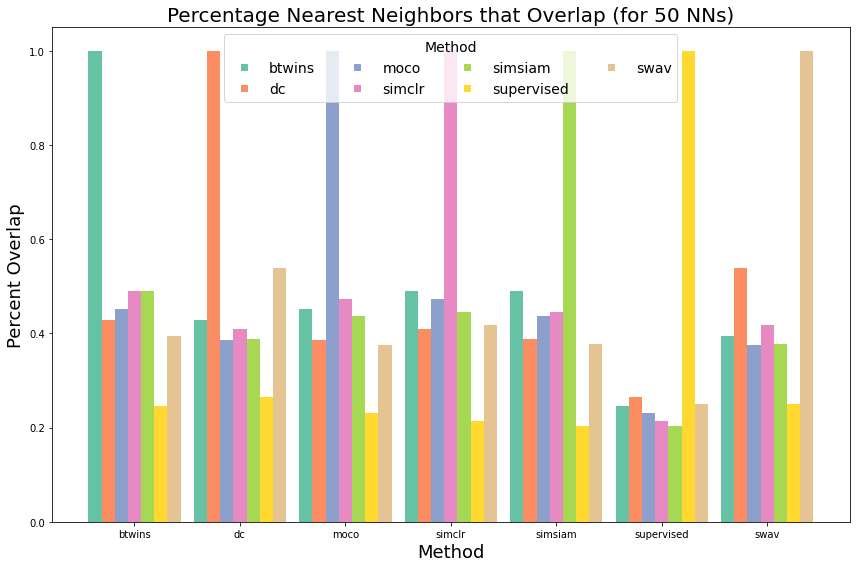

In [2]:
## TODO: consider adding linear eval overlaps as negative bars

import torch
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.get_cmap('Set2')
colormap = np.array(list(cmap.colors))

fig, ax = plt.subplots(1, 1)
x_s, heights, colors = [], [], []
counter = 1
for method_a in method_names:
    for i, method_b in enumerate(method_names): 
        if method_a != method_b:
            x_s.append(counter)
            heights.append(sim_map[method_a][method_b])
            colors.append(i)
        else:
            x_s.append(counter)
            heights.append(1.0)
            colors.append(i)
        counter += 1
    counter += 1

ax.bar(x_s, heights, 1.0, color=colormap[colors])

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colormap[i]) for i in range(7)]
ax.legend(handles,
          method_names,
          title='Method',
          title_fontsize=14,
          scatterpoints=1,
          ncol=4,
          fontsize=14)

middle = len(method_names) // 2
offset = 0.5 + len(method_names) / 2 - middle
ax.set_xticks(offset + np.array(list(range(middle, (1 + len(method_names)) * len(method_names) + middle, 1 + len(method_names)))))
ax.set_xticklabels(method_names)
plt.title(f'Percentage Nearest Neighbors that Overlap (for 50 NNs)', fontsize=20)
plt.xlabel('Method', fontsize=18)
plt.ylabel('Percent Overlap', fontsize=18)

fig.tight_layout()
plt.savefig(f'nn_overlap', bbox_inches = 'tight',
    pad_inches = 0.1)

In [25]:
import numpy as np
import os
import torch

root = '/vulcanscratch/mgwillia/unsupervised-classification/imagenet-'
btwins_neighbors = np.load(root + 'btwins/pretext/topk-val-neighbors.npy')[:,1:]
dc_neighbors = np.load(root + 'dc/pretext/topk-val-neighbors.npy')[:,1:]
moco_neighbors = np.load(root + 'moco/pretext/topk-val-neighbors.npy')[:,1:]
sclr_neighbors = np.load(root + 'sclr/pretext/topk-val-neighbors.npy')[:,1:]
simsiam_neighbors = np.load(root + 'simsiam/pretext/topk-val-neighbors.npy')[:,1:]
sup_neighbors = np.load(root + 'sup/pretext/topk-val-neighbors.npy')[:,1:]
swav_neighbors = np.load(root + 'swav/pretext/topk-val-neighbors.npy')[:,1:]
targets = torch.load(os.path.join('/vulcanscratch/mgwillia/vissl/predictions/', '_'.join(['supervised_r50', 'imagenet', 'targets']) + '.pth.tar'))['val_targets'].numpy()

#method_names = ['btwins', 'dc', 'moco', 'simclr', 'simsiam', 'supervised', 'swav']
#neighbors = [btwins_neighbors, dc_neighbors, moco_neighbors, sclr_neighbors, simsiam_neighbors, sup_neighbors, swav_neighbors]
method_names = ['btwins', 'dc', 'moco', 'simclr', 'simsiam', 'swav']
neighbors = [btwins_neighbors, dc_neighbors, moco_neighbors, sclr_neighbors, simsiam_neighbors, swav_neighbors]

print('NN Purity by Number of Models that Claim it as a Nearest Neighbor:')
num_images_to_sample = btwins_neighbors.shape[0]
num_correct = np.zeros(len(neighbors) + 1)
num_total = np.zeros(len(neighbors) + 1)
for i in range(num_images_to_sample):
    ### count num times each image appears as neighbor
    votes = np.zeros(num_images_to_sample)
    for neighbor_arr in neighbors:
        votes[neighbor_arr[i]] += 1
        
    ### compute percent for each vote count that belongs to same class as anchor
    for j in range(len(neighbors) + 1):
        idxs = (votes == j).nonzero()[0]
        num_correct[j] += np.where(targets[idxs] == targets[i], 1, 0).sum()
        num_total[j] += idxs.shape[0]

        
print(num_correct / num_total)

NN Purity by Number of Models that Claim it as a Nearest Neighbor:
[0.00090981 0.23078222 0.3199713  0.39309875 0.45610851 0.53952554
 0.66764548]


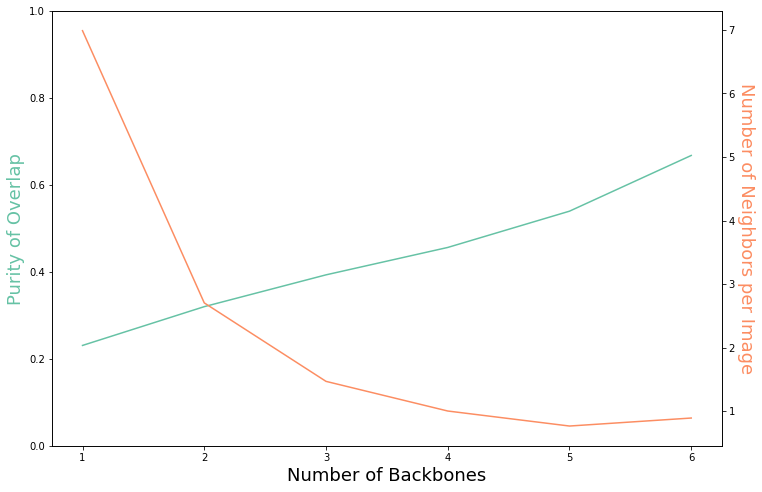

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
cmap = plt.get_cmap('Set2')
colormap = np.array(list(cmap.colors))

ax1 = plt.subplot()
plt.plot(range(num_correct.shape[0] - 1), num_correct[1:] / num_total[1:], color=colormap[0])
plt.xlabel('Number of Backbones', fontsize=18)
plt.ylabel('Purity of Overlap', fontsize=18, color=colormap[0])
plt.ylim(0.0, 1.0)
ax1.set_xticks(range(num_correct.shape[0] - 1))
ax1.set_xticklabels([1, 2, 3, 4, 5, 6])

ax2 = ax1.twinx()
ax2.plot(range(num_correct.shape[0] - 1), num_total[1:] / 50000, color=colormap[1])
plt.ylabel('Number of Neighbors per Image', fontsize=18, color=colormap[1], rotation=270, labelpad=20)

fig.tight_layout()
plt.savefig('nn_purity_through_overlap', bbox_inches = 'tight', pad_inches = 0.1)